In [34]:
from statistics import LinearRegression
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [35]:
data = sm.datasets.copper.load_pandas().data
data

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


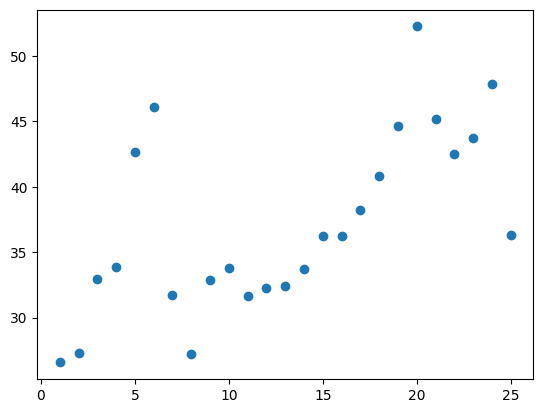

In [36]:
plt.scatter(data["TIME"], data["COPPERPRICE"])
plt.show()

(array([3., 2., 7., 3., 1., 1., 3., 3., 1., 1.]),
 array([26.56 , 29.131, 31.702, 34.273, 36.844, 39.415, 41.986, 44.557,
        47.128, 49.699, 52.27 ]),
 <BarContainer object of 10 artists>)

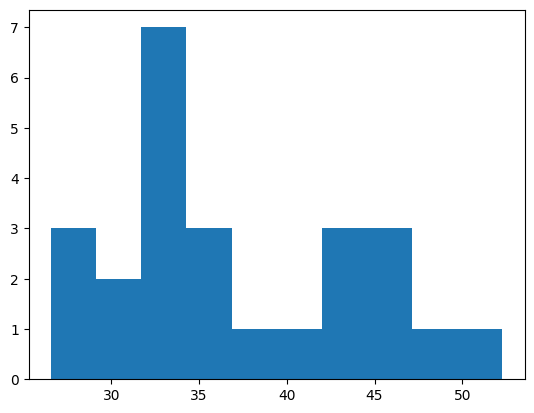

In [37]:
plt.hist(data['COPPERPRICE'])

In [53]:
y_true = np.array(data.COPPERPRICE)
x_data = np.array(data.TIME)

In [55]:
def gradient_descent(x_value, y_value, learning_rate = 0.001, iterations = 10000):
    w = 0.0
    b = 0.0
    for i in range(iterations):
        dw = np.mean(2 * x_value * ((w * x_value + b) - y_value))
        db = np.mean(2 * ((w * x_value + b) - y_value))
        w -= learning_rate * dw
        b -= learning_rate * db
        y_pred = w * x_value + b
        cost = np.mean((y_pred - y_value) ** 2)
        iterations += 1
        print(f"iteration = {i}, cost = {cost:.4}, slop = {w:.4}, intercept = {b:.4}")
        if cost <= 1 : break
    return w, b
slope, intercept = gradient_descent(x_data, y_true)

iteration = 0, cost = 599.8, slop = 1.028, intercept = 0.07434
iteration = 1, cost = 343.4, slop = 1.6, intercept = 0.1218
iteration = 2, cost = 263.9, slop = 1.918, intercept = 0.1543
iteration = 3, cost = 239.2, slop = 2.095, intercept = 0.1784
iteration = 4, cost = 231.4, slop = 2.193, intercept = 0.1979
iteration = 5, cost = 228.8, slop = 2.247, intercept = 0.2149
iteration = 6, cost = 227.9, slop = 2.277, intercept = 0.2303
iteration = 7, cost = 227.5, slop = 2.293, intercept = 0.245
iteration = 8, cost = 227.2, slop = 2.302, intercept = 0.2593
iteration = 9, cost = 227.0, slop = 2.306, intercept = 0.2732
iteration = 10, cost = 226.8, slop = 2.308, intercept = 0.2871
iteration = 11, cost = 226.7, slop = 2.309, intercept = 0.3008
iteration = 12, cost = 226.5, slop = 2.309, intercept = 0.3145
iteration = 13, cost = 226.3, slop = 2.309, intercept = 0.3282
iteration = 14, cost = 226.1, slop = 2.308, intercept = 0.3419
iteration = 15, cost = 225.9, slop = 2.308, intercept = 0.3555
iter

final slope = 0.6128, final iterations = 29.14


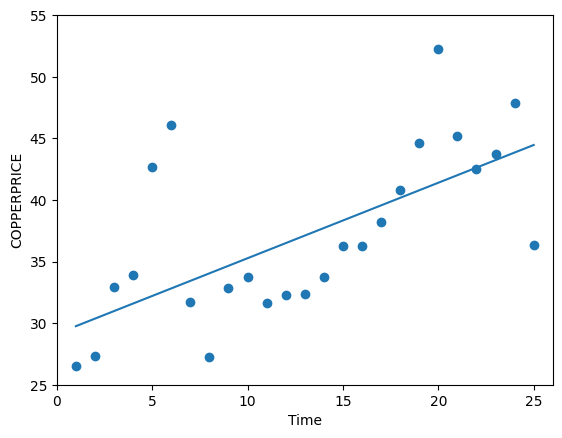

In [56]:
print(f"final slope = {slope:.4}, final iterations = {intercept:.4}")
y_pre = slope * x_data + intercept
plt.plot(x_data, y_pre)
plt.scatter(data["TIME"], data["COPPERPRICE"])
plt.xlabel("Time")
plt.ylabel("COPPERPRICE")
plt.xlim(0, 26)
plt.ylim(25, 55)
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept = False)
regr.fit(np.array(x_data).reshape(-1,1), np.array(y_true).reshape(-1,1))
np.round(regr.coef_, 2)

array([[2.33]])

In [43]:
o = np.power(x_data.T.dot(x_data), -1)
o

0.00018099547511312217

the optimal solution is: 2.33x


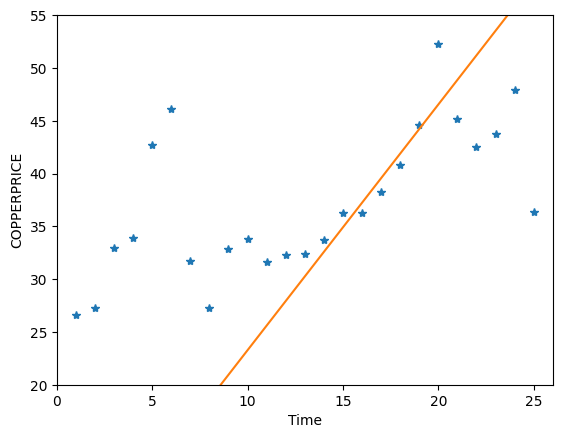

In [58]:
o = np.power(x_data.T.dot(x_data), -1)
o = o * x_data.T
o = o.dot( y_true)
print('the optimal solution is: ' + str(np.round(o, 2)) + 'x')
plt.plot(x_data, y_true, '*')
plt.plot(x_data, o*x_data);
plt.xlabel("Time")
plt.ylabel("COPPERPRICE")
plt.xlim(0, 26)
plt.ylim(20, 55)
plt.show()

In [71]:
def weights (x_val, x_arr, bw):
  return np.exp((-0.5 * (np.subtract(x_val, x_arr) / bw) ** 2))

In [72]:
def LWR(x_value, y_value, bw, learning_rate = 0.001, iterations = 1000):
    w = np.zeros(len(x_value))
    b = np.zeros(len(x_value))
    for i in range(iterations):
        Wight = np.array([weights(xi, x_value, bw) for xi in x_value])
        dw = np.mean([2 * x_value * Wight[:, i] * ((w * x_data + b) - y_value) for i in range(len(x_value))], axis = 0)
        db = np.mean([2 * Wight[:, i] * ((w * x_value + b) - y_value) for i in range(len(x_value))], axis = 0)
        w -= learning_rate * dw
        b -= learning_rate * db
        y_pred = w * x_value + b
        cost = np.mean((y_pred - y_value) ** 2)
        iterations += 1
        # print(f"iteration = {i}")
        # , cost = {cost:.4}, slop = {w:.4}, intercept = {b:.4}")
        if -1 <= cost <= 1 : break
    return w, b
slopeLWR, interceptLWR = LWR(x_data, y_true, 0.01)

In [73]:
var = slopeLWR, interceptLWR 
var

(array([1.96367535, 3.60200976, 5.44480504, 5.93111759, 7.18788906,
        7.09152889, 4.3573646 , 3.33314562, 3.60487615, 3.34355218,
        2.85443312, 2.67142539, 2.47611485, 2.39847685, 2.40597342,
        2.25618677, 2.24106897, 2.26135385, 2.3419337 , 2.60698254,
        2.14561086, 1.92783505, 1.89641509, 1.99154246, 1.45087859]),
 array([1.96367535, 1.80100488, 1.81493501, 1.4827794 , 1.43757781,
        1.18192148, 0.62248066, 0.4166432 , 0.40054179, 0.33435522,
        0.25949392, 0.22261878, 0.19047037, 0.17131978, 0.16039823,
        0.14101167, 0.13182759, 0.12563077, 0.12325967, 0.13034913,
        0.10217195, 0.08762887, 0.08245283, 0.08298094, 0.05803514]))

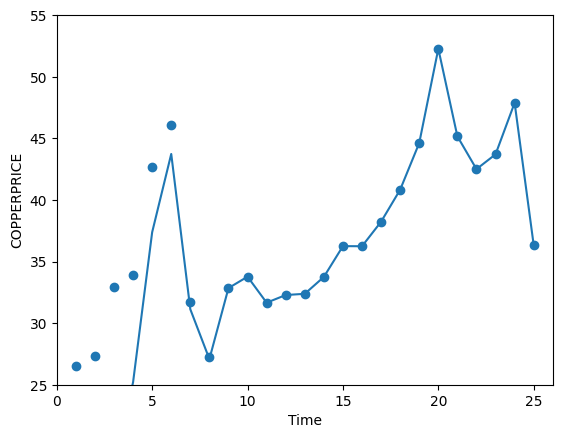

In [74]:
y_pre = slopeLWR * x_data + interceptLWR
plt.plot(x_data, y_pre)
plt.scatter(data.TIME, data.COPPERPRICE)
plt.xlabel("Time")
plt.ylabel("COPPERPRICE")
plt.xlim(0, 26)
plt.ylim(25, 55)
plt.show()

In [112]:
def LWR2(x_value, y_value, bw, learning_rate=0.001, iterations=1000):
    w = np.zeros(len(x_value))
    for i in range(iterations):
        Wight = np.array([weights(xi, x_value, bw) for xi in x_value])
        dw = np.mean([2 * x_value * Wight[:, i] * ((w * x_value ) - y_value) for i in range(len(x_value))], axis=0)
        w -= learning_rate * dw
        y_pred = w * x_value
        cost = np.mean((y_pred - y_value) ** 2)
        iterations += 1
        # print(f"iteration = {i}")
        if -1 <= cost <= 1: break
    return w

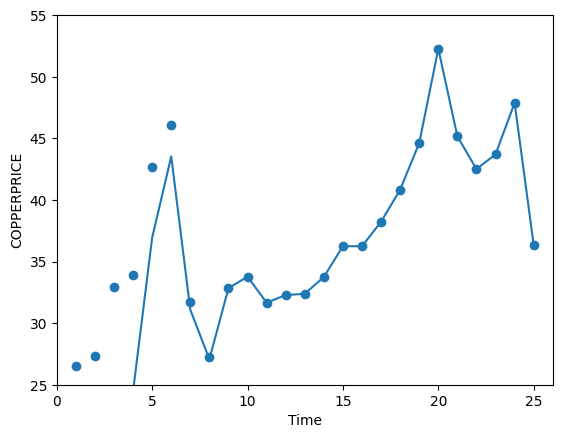

In [113]:
slopeLWR2 = LWR2(x_data, y_true, 0.01)
y_pre = slopeLWR2 * x_data
plt.plot(x_data, y_pre)
plt.scatter(data.TIME, data.COPPERPRICE)
plt.xlabel("Time")
plt.ylabel("COPPERPRICE")
plt.xlim(0, 26)
plt.ylim(25, 55)
plt.show()

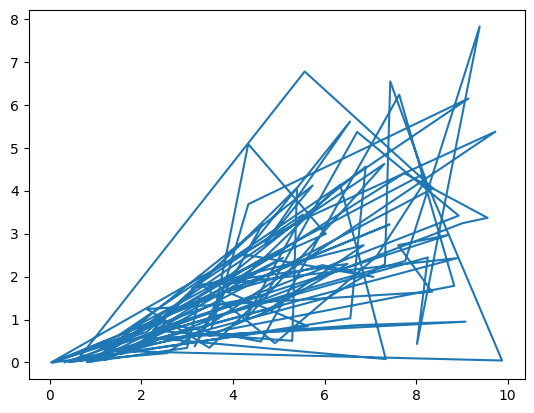

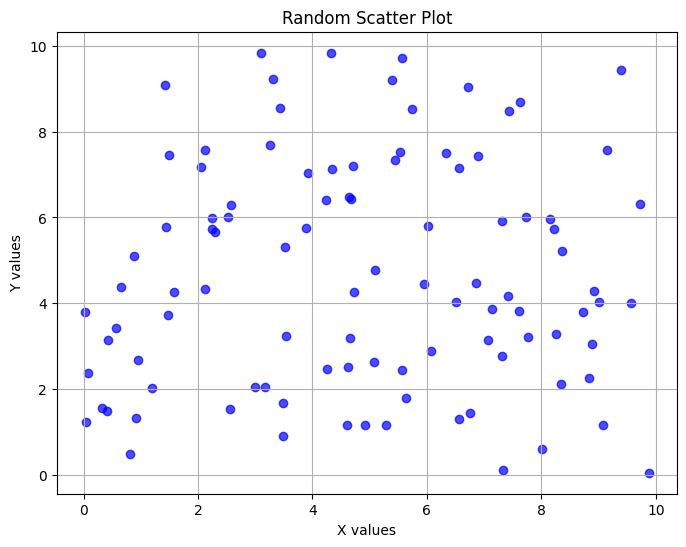

In [114]:
import random
import matplotlib.pyplot as plt


# Generate random data
num_points = 100
x_values = [random.uniform(0, 10) for _ in range(num_points)]
y_values = [random.uniform(0, 10) for _ in range(num_points)]
slopeLWRt = LWR2(np.array(x_values), np.array(y_values), 0.01)
y_pret = slopeLWRt * x_values
plt.plot(x_values, y_pret)
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='b', alpha=0.7)
plt.title("Random Scatter Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.grid(True)
plt.show()


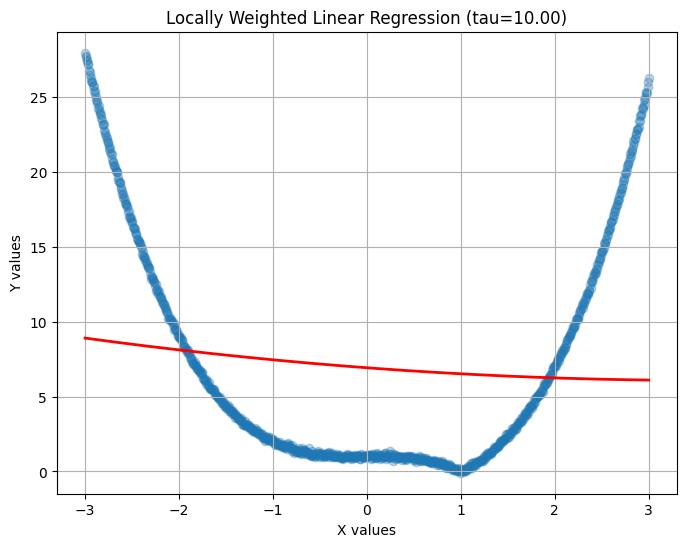

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def local_weighted_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    xw = X.T * weights_calculate(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y
    return x0 @ theta

def weights_calculate(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau ** 2)))

def plot_lwr(tau):
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]

    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, alpha=0.3)
    plt.plot(domain, prediction, color='red', linewidth=2)
    plt.title(f"Locally Weighted Linear Regression (tau={tau:.2f})")
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.grid(True)
    plt.show()

# Generate synthetic data
n = 1000
X = np.linspace(-3, 3, num=n)
Y = np.abs(X ** 3 - 1) + np.random.normal(scale=0.1, size=n)

# Plot LWR with different bandwidth values
plot_lwr(10.)  # Example: tau = 10

